Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(float)

In [3]:
X = np.array(X)

In [4]:
y = np.array(y)

O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística. 

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

In [5]:
# Como os dados já estão aleatorizado, a separação foi feita com 55000 instâncias para treino e 15000 para teste

Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]

In [6]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((55000, 784), (15000, 784), (55000,), (15000,))

In [7]:
ytrain

array([5., 0., 4., ..., 0., 4., 0.])

In [8]:
# Abaixo, transformamos nossa variável target para assumir 2 valores apenas:
# - irá valer 1 se o dígito for par;
# - irá valer 0 se o dígito for ímpar.

ytrain = np.where(ytrain%2 == 0, 1, 0)
ytest = np.where(ytest%2 == 0, 1, 0)

In [9]:
ytrain

array([0, 1, 1, ..., 1, 1, 1])

In [10]:
ytest

array([0, 1, 1, ..., 1, 0, 1])

In [11]:
# Vejamos o balanceamento da nossa variável target:

print('Percentual de classe positiva: ',(ytrain.sum() / ytrain.size) * 100, '%')
print('Percentual de classe negativa: ',((ytrain.size-ytrain.sum()) / ytrain.size) * 100, '%')

Percentual de classe positiva:  49.154545454545456 %
Percentual de classe negativa:  50.84545454545455 %


O dataset ficou bem balanceado.

----

In [12]:
# Instanciamos o modelo
logreg = LogisticRegression()

# Fitamos o objeto instanciado nos dados de treino
logreg.fit(Xtrain, ytrain)

LogisticRegression()

Tendo treinado o algorimo, podemos fazer as predições.

Primeiro, vamos acessar os valores de  𝜃 :

In [13]:
print(logreg.intercept_)
print(logreg.coef_)

[-0.00096029]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.37045481e-05  3.27104331e-05  3.00702983e-06  1.25292910e-07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.20834403e-07  9.93020389e-07  2.57962324e-05  4.77975239e-05
   7.04035797e-05  4.93754290e-05  8.29766686e-05  1.20424855e-04
   2.05525782e-04  2.88619395e-04  1.04435175e-06 -1.51574727e-04
   2.26522415e-04  1.58010329e-04  6.54367833e-05  7.41712297e-05
   7.15030516e-05  3.05181641e-05  5.61725723e-06  3.22644014e-06
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.20811686e-07  8.67180654e

In [15]:
# O correto é ter 784 coeficientes porque a dimensão de colunas do nosso dataset de treinamento
logreg.coef_.size

784

In [16]:
# A função predict da Regressão Logística nos retorna os valores já binarizados (qual a classe que o algoritmo previu)
logreg.predict(Xtrain)

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
# Podemos acessar as probabilidades usando a função predict_proba, 
# que nos retornará um array com várias linhas e duas colunas
# A primeira coluna representa a probabilidade da classe 0 (classe negativa)
# A segunda coluna representa a probabilidade da classe 1 (classe positiva)

logreg.predict_proba(Xtrain)

array([[0.99822148, 0.00177852],
       [0.07069117, 0.92930883],
       [0.22019002, 0.77980998],
       ...,
       [0.00949747, 0.99050253],
       [0.31642515, 0.68357485],
       [0.01305646, 0.98694354]])

In [18]:
# De acordo com o algoritmo, a primeira instância tem 99% de probabilidade de ser da classe 0
ytrain[0]

0

Vemos que a classe real dessa instância é 0, de modo que o algoritmo parece ter aprendido muito bem a classificar.

Podemos comparar as predições desse classificador no dataset de treino (abaixo, consideramos apenas as 20 primeiras instâncias):

In [20]:
logreg.predict(Xtrain)[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [21]:
# comparação com o target real

ytrain[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

O classificador conseguiu acertar todas.

----

CURVA ROC

In [26]:
#fpr = false positive rate = taxa de falso positivos
#tpr = true positive rate = taxa de verdadeiro positivos
#thresholds = limiares usados

fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1]) 

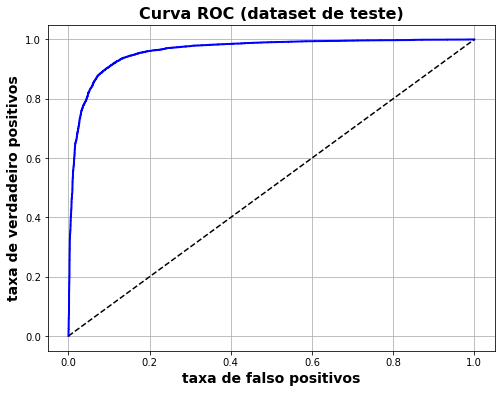

In [27]:
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

A curva está demonstrando que houve baixo número de falsos positivos e alto número de verdadeiros positivos, ou seja, obtemos uma curva ROC próximo ao ideal.

Para quantificarmos um valor associado a ela, usamos a métrica AUC-ROC: area under curve ROC.

A AUC varia entre 0 e 1, sendo que 1 é o melhor valor possível.

No gráfico, a linha pontilhada corresponde a um classificador aleatório, isto é, um modelo sem inteligência que vota 0 ou 1 de forma totalmente aleatória. Neste caso, a AUC do classificador aleatório é 0.5. Quanto maior for a área entre a linha pontilhada e a curva ROC do algoritmo, melhor sua performance.

In [28]:
roc_auc_score(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

0.9623707892219318

Score obtido foi alto = 0.96

----

Validação Cruzada

In [29]:
def validacao_cruzada(classificador, 
                      X, 
                      y, 
                      metrica, 
                      num_folds, 
                      print_info = False, 
                      nome_metrica = None):
    
    lista_metrica_treino = []
    lista_metrica_validacao = []
    
    kf = KFold(n_splits = num_folds)
    for train_index, val_index in kf.split(X, y):
        
        Xtrain_folds = X[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X[val_index]
        yval_fold = y[val_index]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
        
        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)
        
        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))
        
    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))
        
    return lista_metrica_treino, lista_metrica_validacao

In [32]:
for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(classificador = LogisticRegression(),
                 X = Xtrain, 
                 y = ytrain, 
                 metrica = metrica, 
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()

Métrica: Precision
média treino: 0.8951035697209175
média validação: 0.8887853551511025

Métrica: Recall
média treino: 0.9014577489922697
média validação: 0.8959130798906907

Métrica: F1
média treino: 0.8982689331908279
média validação: 0.8923286761900814



----